In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import time
import re
import pandas as pd
from urllib.request import urlopen
from urllib.parse import quote_plus

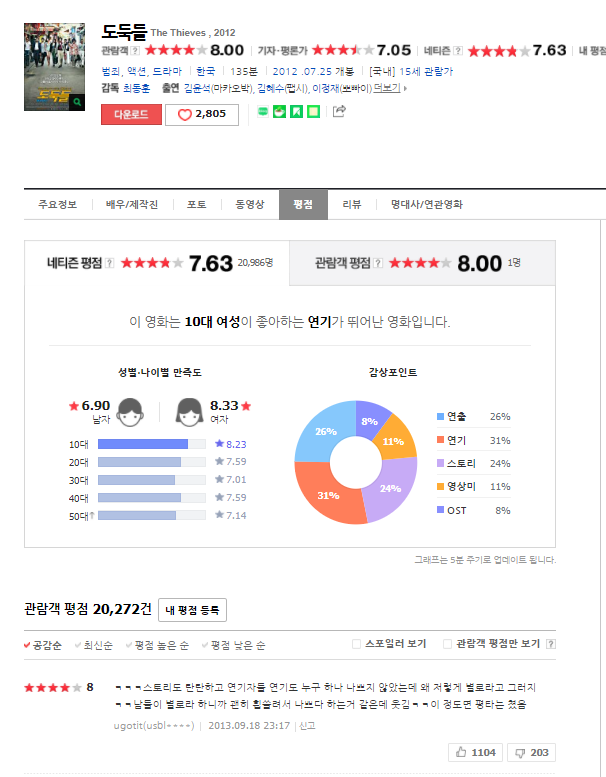

In [3]:
from PIL import Image
Image.open('도둑들.png')

## 네이버 영화 > 평점
### 관람객 평점은 사이트가 따로 있고 영화 / 페이지별로 나눠져 있어서 그 부분만 바꾸면 쉽게 가능!
<br>

https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code={영화_코드}type=after&page={리뷰_페이지_번호}

### __[김혜수]__
- 도둑들 78726
- 관상 93728
- 타짜 57723
- 국가부도의 날 164192
- 굿바이 싱글 139700
<br><br>

### __[이정재]__
- 신과함께 - 죄와 벌 85579
- 도둑들 78726
- 암살 121048
- 신과함께 -인과 연 167697
- 관상 93728

In [2]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=78726&type=after&page=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser') 

score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li') 
review_text = lis[0].find('p').getText() # 리뷰글
score = lis[0].find('em').getText() # 별점
like = lis[0].find('div', {'class': 'btn_area'}).findAll('strong')[0].getText() # 추천 수
dislike = lis[0].find('div', {'class': 'btn_area'}).findAll('strong')[1].getText() # 비추천 수
nickname = lis[0].findAll('a')[0].find('span').getText()  # 아이디

result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
int(result.replace(',', ''))  # 총 리뷰 개수

20272

In [3]:
print(review_text)
print('='*50) 
review_text = review_text.replace('\t', '')
review_text = review_text.replace('\r', '')
review_text = review_text.replace('\n', '') 
print(review_text)




														
															
															
																ㅋㅋㅋ스토리도 탄탄하고 연기자들 연기도 누구 하나 나쁘지 않았는데 왜 저렇게 별로라고 그러지ㅋㅋ남들이 별로라 하니까 괜히 휩쓸려서 나쁘다 하는거 같은데 웃김ㅋㅋ이 정도면 평타는 쳤음 
															
														
														
													

ㅋㅋㅋ스토리도 탄탄하고 연기자들 연기도 누구 하나 나쁘지 않았는데 왜 저렇게 별로라고 그러지ㅋㅋ남들이 별로라 하니까 괜히 휩쓸려서 나쁘다 하는거 같은데 웃김ㅋㅋ이 정도면 평타는 쳤음 


In [2]:
def get_data(url):
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis = score_result.findAll('li')
    
    for li in lis:
        review_text = li.find('p').getText()
        # 리뷰 텍스트 이상해서 고쳐줌
        review_text = review_text.replace('\t', '')
        review_text = review_text.replace('\r', '')
        review_text = review_text.replace('\n', '') 

        score = li.find('em').getText()
        btn_likes = li.find('div', {'class': 'btn_area'}).findAll('strong')
        like = btn_likes[0].getText()
        dislike = btn_likes[1].getText()

        # 프린트
        #print(review_text, score, like, dislike)

        # 리스트 저장
        star_list.append(score) # 별점
        chat_list.append(review_text) # 리뷰
        recom_list.append(like) # 추천 수
        unrecom_list.append(dislike) # 비추천 수

#### 김혜수

In [29]:
star_list = []; chat_list=[]; recom_list = []; unrecom_list = [] 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=78726&type=after'
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))


for i in range(1, int(total_count / 10) + 1): 
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 

In [30]:
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('도둑들 리뷰.csv') 
pd.read_csv('도둑들 리뷰.csv') 

,Unnamed: 0,별점,리뷰,추천 수,비추천 수
0,0,8,ㅋㅋㅋ스토리도 탄탄하고 연기자들 연기도 누구 하나 나쁘지 않았는데 왜 저렇게 별로라...,1104,203
1,1,8,걍 전지현의 매력을 다시 살려준 영화..,1053,176
2,2,6,웨이홍 역 캐스팅에 돈을 좀 투자했었어야....,1147,301
3,3,8,사기꾼들이란 제목이 더 어울릴정도로.. 계속된 뒷통수 반전들이.. 2시간 넘게 집중...,748,100
4,4,8,김윤석 액션 연기 볼만했음,621,69
...,...,...,...,...,...
20315,20315,10,ㅠ,1,9
20316,20316,1,최악의영화 불과 10년도 채 되지않았지만 재평가돼야할 영화,3,11
20317,20317,1,아.. 방금 티비에서 봤는데 이거 완전 개 쓰레기 영화네 이딴걸 영화라고 ㅉㅉㅉ,3,11
20318,20318,1,이 영화는 절도 범죄를 미화하는 부정적 효과가 있다고 봄.,1,10


In [3]:
# 관상
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=93728&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))


for i in range(1, int(total_count / 10) + 1): 
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('관상 리뷰.csv') 

In [4]:
# 타짜
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=57723&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)


for i in range(1, int(total_count / 10) + 1): 
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('타짜 리뷰.csv') 

9757


In [5]:
# 국가부도의 날
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=164192&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)

for i in range(1, int(total_count / 10) + 1):
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('국가부도의날 리뷰.csv') 

14396


In [6]:
# 굿바이 싱글
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=139700&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)

for i in range(1, int(total_count / 10) + 1): 
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('굿바이 싱글 리뷰.csv') 

6510


#### 이정재

In [7]:
# 신과함께 - 죄와 벌
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=85579&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)

for i in range(1, int(total_count / 10) + 1): 
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('신과함께 - 죄와 벌 리뷰.csv') 

57167


In [8]:
# 암살
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=121048&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)

for i in range(1, int(total_count / 10) + 1):
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('암살 리뷰.csv') 

39573


In [9]:
# 신과함께 - 인과 연
star_list.clear() ; chat_list.clear() ; recom_list.clear() ; unrecom_list.clear() 

p_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=167697&type=after'
resp = requests.get(p_url)
html = BeautifulSoup(resp.content, 'html.parser')
result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[0].getText()
total_count = int(result.replace(',', ''))
print(total_count)

for i in range(1, int(total_count / 10) + 1):
    url = p_url + '&page=' + str(i)
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    get_data(url) 
    
df = pd.DataFrame({'별점': star_list, '리뷰': chat_list, '추천 수': recom_list, '비추천 수': unrecom_list})
df.to_csv('신과함께 - 인과 연 리뷰.csv') 

40004
